# The Brand Assesment

#### This notebook contains the exploratory data analysis for the Brand Case Study.The EDA explores data structure to reveal structure of the data and capture data points relevant to the given KPIs

In [23]:
#Import important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load datasets
data = pd.read_csv("the_brand.csv")
data.head()

,date_id,mttnsubad,raw_account_id,raw_account_name,raw_publisher_id,raw_publisher_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,...,page_views_experience,event_install_fitnessplus_entitlements,cid_creative,event_install_tvplus_amplify_subscription,event_fitness_plus_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager
0,03/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0
1,04/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0
2,05/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0
3,06/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0
4,07/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0


## Exploratory Data Analysis

In [3]:
#Whats in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Columns: 105 entries, date_id to phone_bf_engager
dtypes: float64(28), int64(36), object(41)
memory usage: 74.0+ KB


In [4]:
# Descriptive statistics for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mttnsubad,90.0,2.837301e+06,764858.094525,0.0,2998299.75,3019066.0,3045897.00,3237783.0
raw_publisher_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raw_publisher_name,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clicks,88.0,8.419318e+01,168.631943,0.0,6.75,19.5,54.25,688.0
video_starts,86.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...
event_install_mls_subscription,90.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
mac_bf_engager,90.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
watch_bf_engager,90.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
ipad_bf_engager,90.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0


**Comments**  
-There are a lot of columns where the entire distribution is 0  
-Presence of non-normal distributions  

-Many columns have missing values


In [5]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [6]:
# Check for missing values in depth
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
missing_df.index.name ="Column"
print("\nMissing Values Summary:")
missing_df


Missing Values Summary:


,Missing Values,Percentage
Column,,
date_id,0,0.0
mttnsubad,0,0.0
raw_account_id,0,0.0
raw_account_name,0,0.0
raw_publisher_id,90,100.0
...,...,...
event_install_mls_subscription,0,0.0
mac_bf_engager,0,0.0
watch_bf_engager,0,0.0


In [7]:
#What percentage of the columns have missing values
columns_with_missing_values =  missing_df[missing_df["Percentage"] > 0].reset_index()
number_of_columns_with_missing_values = columns_with_missing_values.shape[0]
percentage_missing = number_of_columns_with_missing_values / len(data.columns) * 100
print("\nNumber of Columns with Missing Values:" , number_of_columns_with_missing_values)
print("Percentage of Columns with Missing Values:" , round(percentage_missing,2),"%")


Number of Columns with Missing Values: 33
Percentage of Columns with Missing Values: 31.43 %


In [8]:
#Get all columns which dont have values ie 100% null
null_columns =  missing_df[missing_df["Percentage"] == 100].reset_index()
null_columns

,Column,Missing Values,Percentage
0,raw_publisher_id,90,100.0
1,raw_publisher_name,90,100.0
2,placement_tracking_type,90,100.0
3,creative_offer,90,100.0
4,page_views,90,100.0
5,airtags_add_to_cart_visits,90,100.0
6,app_downloads_vuze,90,100.0
7,cid_creative,90,100.0
8,event_fitness_plus_subscription,90,100.0


#### Comment
- Columns about bounces ,views and engager all have 0 as a value or null
- Most granular metrics like event_install,potential_watch_buyer_visit etc have zeros for all campaigns.This might be an indication that the data collection for those specific data points in the user journey was not done properly(or data not available)
- 34 % of the columns have null values, some columns particulary user activity metrics do not have null values but zeros instead

In [9]:
#Remove columns with  no values ie percentage of missing values is 100
#More null values or zero columns to be investigated later
columns_to_remove = null_columns["Column"].tolist()
# Remove those columns from the dataFrame
data = data.drop(columns=columns_to_remove)
data.head()

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,total_seconds_spent_experience,page_views_dotcom,page_views_experience,event_install_fitnessplus_entitlements,event_install_tvplus_amplify_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager
0,03/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,04/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,05/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,06/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,07/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


### Explore the volume, cost and efficiency columns to identify distribution and fix any outlier issues

In [10]:
#Add the CTR effeciency column
data["CTR"] = data["clicks"]/data["impressions"] * 100
data.head()

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,page_views_dotcom,page_views_experience,event_install_fitnessplus_entitlements,event_install_tvplus_amplify_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,CTR
0,03/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.206769
1,04/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.222886
2,05/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.204210
3,06/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.203068
4,07/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.207601


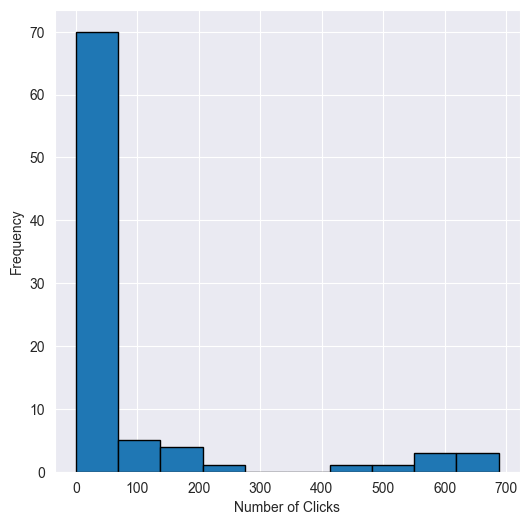

In [11]:
# Clicks distribution
# Check  the distribution of clicks
plt.figure(figsize = (6,6))
plt.hist(data["clicks"], bins=10, edgecolor='k')
plt.ylabel("Frequency")
plt.xlabel("Number of Clicks");

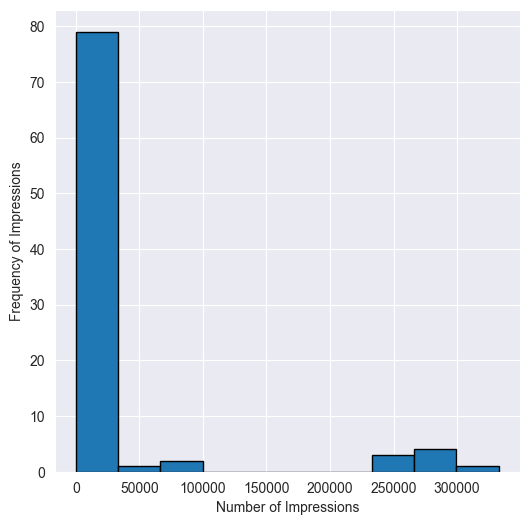

In [12]:
# Impresssions distribution
plt.figure(figsize = (6,6))
plt.hist(data["impressions"], bins=10, edgecolor='k')
plt.ylabel("Frequency of Impressions")
plt.xlabel("Number of Impressions");

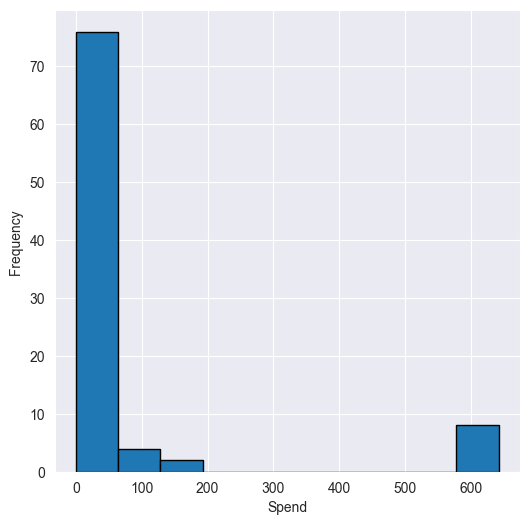

In [13]:
# Check  the distribution of spend
plt.figure(figsize = (6,6))
plt.hist(data["spend_net_usd"], bins=10, edgecolor='k')
plt.ylabel("Frequency ")
plt.xlabel("Spend");

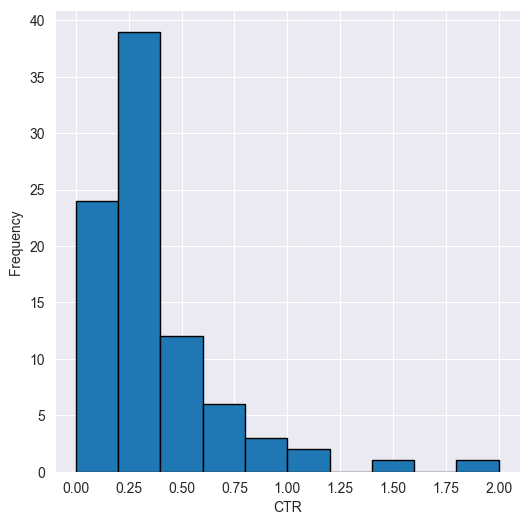

In [14]:
# Check  the distribution of CTR
plt.figure(figsize = (6,6))
plt.hist(data["CTR"], bins=10, edgecolor='k')
plt.ylabel("Frequency ")
plt.xlabel("CTR");

#### Comment
- Distributions are centered around the edges
- No/low middle values
- Most of the values are concentrated on the lower end of the x-axis (close to 0).
- A few campaigns have significantly higher clicks (e.g., 500–700 range). These campaigns could be anomalies or high-performing campaigns compared to the others
- Based on the pattern of spend,its possible that the edge case spending might also be influencing the distribution of the clicks/ impressions graphs.
- CTR is right skewed, values are also very low with max being 2%

In [15]:
#Check again distribution of these main columns
key_columns = data[["clicks","impressions","spend_net_usd","CTR"]]
key_columns.describe()

Column,clicks,impressions,spend_net_usd,CTR
count,88.000000,90.000000,90.000000,88.000000
mean,84.193182,32844.777778,75.714174,0.363901
std,168.631943,78265.530860,171.035919,0.317229
min,0.000000,3.000000,0.000000,0.000000
25%,6.750000,1938.000000,8.104150,0.188433
50%,19.500000,5307.500000,16.402100,0.269965
75%,54.250000,12638.500000,32.167200,0.474955
max,688.000000,332738.000000,642.370000,2.000000


### Comment  
-There is significant variability in clicks,as indicated by the large standard deviation compared to the mean.  
-The majority of impressions are concentrated below 12,638.5 (75th percentile), but the maximum value of 332,738 shows some extreme outliers.  
-The average spend is 75.71, but the median is 16.40, showing that most campaigns have lower spend, and a few campaigns with very high spend (max 642.37) inflate the average
-The average number of clicks is 84.19, but the maximum (688) is much higher than the 75th percentile (54.25). This indicates potential outliers  
-A median of 19.5 suggests that half of the campaigns receive relatively low clicks compared to the average, indicating a skewed distribution

In [ ]:
#Because of how skewed the distributiions are, check the relationships between the three KPIs to explore possibility of segmentaing the data instead of removing "outliers", this might provide more meaningful insights

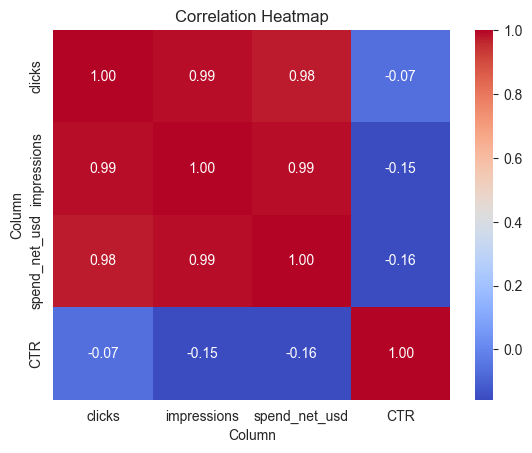

In [16]:
#Check for correlation
# Correlation matrix
correlation_matrix = key_columns.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show();


### Comment
- All variables except CTR have a very strong positive correlation
- CTR has weak negative correlation with all variables

In [ ]:
# Since outliers might give an performance indication of different strategies, we can segment the data into three segments based on spend.Spend is the variable we can directly control from these KPIs, so it will be effective to see the variation of the other metrics based on spend categories[Low,Medium and High]

In [17]:
#Solve the null issue in the clicks column
data['clicks'] = data['clicks'].fillna(0)
# Calculate percentiles
low_percentile = data["spend_net_usd"].quantile(0.33)
high_percentile = data["spend_net_usd"].quantile(0.67)

#Create categories based on the percentiles
conditions = [
    (data["spend_net_usd"] <= low_percentile),    # Low spend: <= 33rd percentile
    (data["spend_net_usd"] > low_percentile) & (data["spend_net_usd"] <= high_percentile),  # Medium spend: between 33rd and 67th percentile
    (data["spend_net_usd"] > high_percentile)     # High spend: > 67th percentile
]

# Corresponding labels for the conditions
labels = ['Low Spend', 'Medium Spend', 'High Spend']

# Create a new column for the spend category
data['spend_category'] = pd.cut(data["spend_net_usd"], bins=[-float('inf'), low_percentile, high_percentile, float('inf')], labels=labels)
data

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,page_views_experience,event_install_fitnessplus_entitlements,event_install_tvplus_amplify_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,CTR,spend_category
0,03/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0.206769,High Spend
1,04/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0.222886,High Spend
2,05/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0.204210,High Spend
3,06/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0.203068,High Spend
4,07/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0.207601,High Spend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,13/01/2023,0,727787507,THE BRAND IN (INR),163391,Q223/Q323 Upgraders Programmatic Display,3237781,03067959_wwa_in_dis_phModeln_phnupabc_pdis_dv3...,1031432,INEN_UPG_DCO_320x480_BAN_ALL_NA_AIP_NA_NA_NA_NA,...,0,0,0,0,0,0,0,0,0.129983,High Spend
86,13/01/2023,0,4471534,TheBrand_EUR,1074569554,02967646_Marcom_Digital_phone_2023 phone model...,1078838883,03065507_wwa_es_dis_phModeln_phnupabc_pdis_dv3...,na,ESES_14PV11_STATIC_320x480_BAN_YXIVPL_BBDSPL_N...,...,0,0,0,0,0,0,0,0,1.447393,Medium Spend
87,13/01/2023,0,5183348,THE BRAND Canada,1074569600,02967646_Marcom_Digital_phone_2023 phone model...,1078840353,02977633_WWA_CA_DIS_phModelN_phnupabc_PDIS_DV3...,na,Prima-Donna-CAFR-Upgraders-414x736,...,0,0,0,0,0,0,0,0,NaN,Low Spend
88,13/01/2023,0,4029436,THE BRAND KR (KRW),1074570016,02967646_Marcom_Digital_phone_2023 phone model...,1078841457,03000201_wwa_kr_dis_phModeln_phnupabc_pdis_dv3...,na,Prima-Donna-KR-Upgraders-300x250,...,0,0,0,0,0,0,0,0,0.172951,Low Spend


### Calculated KPI Columns

In [18]:
#Since we will be comparing values either as in the US or Worldwide, create a new column to classify as US or Worldwide
data["Country"] = data["market"].apply(lambda x: "US" if x == "United States" else "Worldwide")
data

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,event_install_fitnessplus_entitlements,event_install_tvplus_amplify_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,CTR,spend_category,Country
0,03/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0.206769,High Spend,US
1,04/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0.222886,High Spend,US
2,05/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0.204210,High Spend,US
3,06/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0.203068,High Spend,US
4,07/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0.207601,High Spend,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,13/01/2023,0,727787507,THE BRAND IN (INR),163391,Q223/Q323 Upgraders Programmatic Display,3237781,03067959_wwa_in_dis_phModeln_phnupabc_pdis_dv3...,1031432,INEN_UPG_DCO_320x480_BAN_ALL_NA_AIP_NA_NA_NA_NA,...,0,0,0,0,0,0,0,0.129983,High Spend,Worldwide
86,13/01/2023,0,4471534,TheBrand_EUR,1074569554,02967646_Marcom_Digital_phone_2023 phone model...,1078838883,03065507_wwa_es_dis_phModeln_phnupabc_pdis_dv3...,na,ESES_14PV11_STATIC_320x480_BAN_YXIVPL_BBDSPL_N...,...,0,0,0,0,0,0,0,1.447393,Medium Spend,Worldwide
87,13/01/2023,0,5183348,THE BRAND Canada,1074569600,02967646_Marcom_Digital_phone_2023 phone model...,1078840353,02977633_WWA_CA_DIS_phModelN_phnupabc_PDIS_DV3...,na,Prima-Donna-CAFR-Upgraders-414x736,...,0,0,0,0,0,0,0,NaN,Low Spend,Worldwide
88,13/01/2023,0,4029436,THE BRAND KR (KRW),1074570016,02967646_Marcom_Digital_phone_2023 phone model...,1078841457,03000201_wwa_kr_dis_phModeln_phnupabc_pdis_dv3...,na,Prima-Donna-KR-Upgraders-300x250,...,0,0,0,0,0,0,0,0.172951,Low Spend,Worldwide


In [ ]:
#We have 2 platforms each with varying KPIs.
#Divide the data among the two platforms

In [19]:
data["platform"].value_counts()

platform
Social                  78
Programmatic Display    12
Name: count, dtype: int64

In [20]:
# Programmatic display is website data and social data
web_campaigns = data[data["platform"] == "Programmatic Display"]
app_campaigns = data[data["platform"] == "Social"]
web_campaigns.head()

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,event_install_fitnessplus_entitlements,event_install_tvplus_amplify_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,CTR,spend_category,Country
25,13/01/2023,3237764,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237764,3067264_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465898859,110123_03067264_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0,0,0.000000,Medium Spend,Worldwide
34,14/01/2023,3237782,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237782,3067880_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465897869,110123_03067880_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0,0,0.191939,Medium Spend,Worldwide
57,18/01/2023,3237783,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237783,3049961_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465900360,110123_03049961_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0,0,0.288948,High Spend,Worldwide
66,19/01/2023,3237764,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237764,3067264_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465898859,110123_03067264_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0,0,0.157729,Medium Spend,Worldwide
70,19/01/2023,3237783,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237783,3049961_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465900360,110123_03049961_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0,0,0.260973,High Spend,Worldwide


In [ ]:
# KPI calculation for web data
#Visits to com column has zeros throughout(data collection error/ data unavailable)  
# Engagements column has values so can be used to calculate engaged visits volume
#Performance values for volume is all zeros
#The columns for completion rates are zeros ( CR 75% = (views_75 / video_starts) * 100)
#CTR is already calculated
# BR% = (bounces / visits) * 100 , bounces and visits columns are zeros
# QVR% = (potential_phone_buyer_visit / visits) * 100, columns have zeros
# Other Effeciency KPIs  also have zeros



In [24]:
#Cost per view
web_campaigns["CPCV"] = web_campaigns["spend_net_usd"] / web_campaigns["impressions"]
#Cost per Click ($CPC)
web_campaigns["CPC"]  = web_campaigns["spend_net_usd"] / web_campaigns["clicks"]
#Cost per visit
#Data for CPV is not possible because visits column is all zeros
#This is also the same with the other Cost KPIs
# Replace inf and -inf with 0
web_campaigns.replace([np.inf, -np.inf], 0, inplace=True)
web_campaigns.head()


Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,CTR,spend_category,Country,CPCV,CPC
25,13/01/2023,3237764,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237764,3067264_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465898859,110123_03067264_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0.000000,Medium Spend,Worldwide,0.025627,0.000000
34,14/01/2023,3237782,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237782,3067880_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465897869,110123_03067880_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0.191939,Medium Spend,Worldwide,0.021458,11.179800
57,18/01/2023,3237783,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237783,3049961_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465900360,110123_03049961_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0.288948,High Spend,Worldwide,0.023852,8.254775
66,19/01/2023,3237764,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237764,3067264_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465898859,110123_03067264_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0.157729,Medium Spend,Worldwide,0.024955,15.821600
70,19/01/2023,3237783,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237783,3049961_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465900360,110123_03049961_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0.260973,High Spend,Worldwide,0.023622,9.051518


In [26]:
#App specific Metrics
#There is no consideration and performance values for volume
#All other effeciency metrics not possible because of zero values .CTR is already calculated
#Cost per view
app_campaigns["CPCV"] = app_campaigns["spend_net_usd"] / app_campaigns["impressions"]
#Cost per Click ($CPC)
app_campaigns["CPC"]  = app_campaigns["spend_net_usd"] / app_campaigns["clicks"]
app_campaigns.replace([np.inf, -np.inf], 0, inplace=True)
app_campaigns.head()

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,CTR,spend_category,Country,CPCV,CPC
0,03/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0.206769,High Spend,US,0.001864,0.901628
1,04/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0.222886,High Spend,US,0.002112,0.947581
2,05/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0.204210,High Spend,US,0.002100,1.028439
3,06/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0.203068,High Spend,US,0.002495,1.228898
4,07/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0.207601,High Spend,US,0.002399,1.155598


In [ ]:
#Calculated metrics for the whole dataset
#Cost per view
data["CPCV"] = data["spend_net_usd"] / data["impressions"]
#Cost per Click ($CPC)
data["CPC"]  = data["spend_net_usd"] / data["clicks"]
data.replace([np.inf, -np.inf], 0, inplace=True)

## Furthur Analysis

In [27]:
#Campaign Run time
#Correct Date Format
data["date_id"] = pd.to_datetime(data["date_id"],dayfirst=True)

campaign_start_date = data["date_id"].min()
campaign_end_date = data["date_id"].max()
print(f"Campaign Duration : {campaign_start_date} - {campaign_end_date}")

Campaign Duration : 2023-01-03 00:00:00 - 2023-01-21 00:00:00


In [28]:
#Campaign Markets
data["market"].value_counts()

market
India                   13
United Arab Emirates     9
United States            8
Japan                    8
United Kingdom           8
Turkey                   7
Spain                    5
Switzerland              5
Canada                   5
France                   4
Saudi Arabia             4
Germany                  3
Australia                3
Italy                    2
South Korea              2
Taiwan                   1
Malaysia                 1
Singapore                1
Thailand                 1
Name: count, dtype: int64

In [29]:
# Campaign Channels
data["publisher"].unique().tolist()

['Twitter', 'Snapchat', 'DV360 DSP']

In [30]:
# Creatives  formats used
data["creative_format"].unique().tolist()

['Static']

In [31]:
# Creative Products
data["creative_product"].value_counts()

creative_product
phone modelabc Plus    77
phone modelabc         13
Name: count, dtype: int64

In [32]:
# Creative Features
data["creative_feature"].value_counts()

creative_feature
Display / Upgrade your display to bigger and better    90
Name: count, dtype: int64

In [33]:
# Creative CTA
data["creative_cta"].value_counts()

creative_cta
Upgrade Now    64
Name: count, dtype: int64

In [34]:
# Creative dimensions used
data["creative_dimensions"].unique().tolist()

['1:1 AR', '9:16 AR', '320x480', '414x736', '300x250']

### KPI and Trends by Region

In [ ]:
# Volume, Efficiency & Cost

In [35]:
#Regional views(Volume)
regional_views_volume = data.groupby(["Country"])["impressions"].sum().reset_index()
regional_views_volume

,Country,impressions
0,US,2217680
1,Worldwide,738350


In [39]:
# Accounting for outliers ,adding a third dimension(spend)
regional_views_volume = data.groupby(["Country","spend_category"])["impressions"].mean().reset_index()
regional_views_volume

,Country,spend_category,impressions
0,US,Low Spend,NaN
1,US,Medium Spend,NaN
2,US,High Spend,277210.000000
3,Worldwide,Low Spend,3026.800000
4,Worldwide,Medium Spend,6393.333333
5,Worldwide,High Spend,20715.727273


In [40]:
# Accounting for outliers ,adding a third dimension(spend)
regional_clicks_volume = data.groupby(["Country","spend_category"])["clicks"].mean().reset_index()
regional_clicks_volume

,Country,spend_category,clicks
0,US,Low Spend,NaN
1,US,Medium Spend,NaN
2,US,High Spend,592.750000
3,Worldwide,Low Spend,10.633333
4,Worldwide,Medium Spend,32.200000
5,Worldwide,High Spend,62.818182


In [43]:
#Average CTR for app and web in the US Vs Worldwide
# Accounting for outliers ,adding a third dimension(spend)
regional_CTR_volume_app = app_campaigns.groupby(["Country","spend_category"])["CTR"].mean().reset_index()
regional_CTR_volume_web = web_campaigns.groupby(["Country","spend_category"])["CTR"].mean().reset_index()
regional_CTR_volume_web["platform"] = "web"
regional_CTR_volume_app["platform"] = "app"
regional_CTR =pd.concat([regional_CTR_volume_app, regional_CTR_volume_web])
regional_CTR


,Country,spend_category,CTR,platform
0,US,Low Spend,NaN,app
1,US,Medium Spend,NaN,app
2,US,High Spend,0.213715,app
3,Worldwide,Low Spend,0.320885,app
4,Worldwide,Medium Spend,0.477164,app
5,Worldwide,High Spend,0.357842,app
0,Worldwide,Low Spend,0.172951,web
1,Worldwide,Medium Spend,0.485311,web
2,Worldwide,High Spend,0.169976,web


In [44]:
#Regional Clicks( Cost Per Click)
regional_clicks_cost_app = app_campaigns.groupby(["Country","spend_category"])["CPC"].mean().reset_index()
regional_clicks_cost_web = app_campaigns.groupby(["Country","spend_category"])["CPC"].mean().reset_index()
regional_clicks_cost_web["platform"] = "web"
regional_clicks_cost_app["platform"] = "app"
regional_clicks_cost =pd.concat([regional_clicks_cost_app,regional_clicks_cost_web])
regional_clicks_cost


,Country,spend_category,CPC,platform
0,US,Low Spend,NaN,app
1,US,Medium Spend,NaN,app
2,US,High Spend,1.043654,app
3,Worldwide,Low Spend,0.707507,app
4,Worldwide,Medium Spend,1.435980,app
5,Worldwide,High Spend,1.066812,app
0,US,Low Spend,NaN,web
1,US,Medium Spend,NaN,web
2,US,High Spend,1.043654,web
3,Worldwide,Low Spend,0.707507,web
